In [ ]:
## Predict Model Wrapper

## Train
# on ini Train
# Takes a data frame a
# Takes the x names as list
# Takes the split value default 20%
# holds a model
# holds test set
# holds train set
# holds the x values needed

## Simple Test (default is internal test set)
# returns a MSE for the model 

## Predict input
# use case is taking a peace out of the set and mod


# Extra function 
# pull a house for upgrade or price check



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [85]:


class OLSregModelWrapper():
    def __init__(self, df, lst_x, label='none', const_en = False,yn='price', test_s = 0.2):
        self.RegModel = None
        self.y_hat = None
        self.testMSE = None
        self.testMSE_relativ = None
        self.lst_x = lst_x
        self.label = label
        
        # prep
        y=df[yn]
        X=df[lst_x]#.drop(yn,axis=1)
        if const_en:
            X = sm.add_constant(X)
        
        
        self.x_train,self.x_test,self.y_train,self.y_test= \
            train_test_split(X,y,test_size=test_s)
        
        # Train and Test
        self.Train()
        self.Test()
        
        
        
    def Train(self):
        self.RegModel = sm.OLS(self.y_train ,self.x_train).fit()
        
    
    def Test(self):
        self.y_hat = self.RegModel.predict(self.x_test)
        self.testMSE = mean_squared_error(y_true = self.y_test, y_pred = self.y_hat)
        self.testMSE = np.sqrt(self.testMSE)
        self.testMSE_relativ = self.testMSE/(self.y_test.mean())
    
    def PlotTest(self,a=1.0):
        plt.plot(self.y_hat-self.y_test,'o',label=self.label, alpha=a) 
        pass
    
    def PlotRes(self,a=1.0):
        plt.plot(self.RegModel.resid,'o',label=self.label, alpha=a)
        pass
        
    
    def predict(self, df):
        if const_en:
            X = sm.add_constant(df[self.lst_x])
        else:
            X = df[self.lst_x]
        return self.RegModel.predict(X)
        
    
    


In [15]:
df_raw = pd.read_csv('King_County_House_prices_dataset.csv')
df_raw.columns
#j ='price'
#df_raw[j]

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [102]:
l = ['sqft_living', 'condition' ,'grade', \
     'yr_built','yr_renovated','lat' ,'long']


Model_E0 = OLSregModelWrapper(df_raw,['sqft_living'],'E0')

Model_E1 = OLSregModelWrapper(df_raw,['sqft_living', 'condition' ,'grade', \
     'yr_built'],'E1')

Model_E2 = OLSregModelWrapper(df_raw,['sqft_living', 'condition' ,'grade', \
     'yr_built','lat' ,'long'],'E2',True)

Model_E3 = OLSregModelWrapper(df_raw,['sqft_living', 'condition' ,'grade', \
     'yr_built','lat' ,'long'],'E3',False)

print((Model_E0.testMSE_relativ, Model_E1.testMSE_relativ, Model_E2.testMSE_relativ))

(0.48126787873755505, 0.47539757924918297, 0.3913494400016283)


/Users/arnescheunemann/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


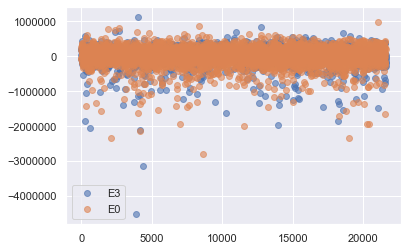

In [101]:
#plt.subplot(1,2,1)
#Model_E1.PlotTest(0.7)
#plt.subplot(1,2,2)
#Model_E2.PlotTest(0.4)
Model_E3.PlotTest(0.6)
Model_E0.PlotTest(0.6)
plt.legend()

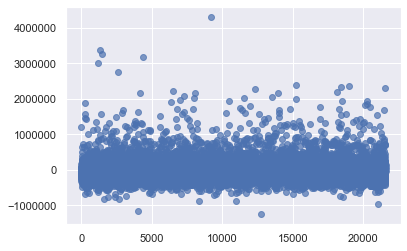

In [89]:
Model_E0.PlotRes(0.7)

In [104]:
Model_E1.RegModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                          2.747e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):                        0.00
Time:                        15:49:44   Log-Likelihood:                     -2.3849e+05
No. Observations:               17277   AIC:                                  4.770e+05
Df Residuals:                   17273   BIC:                                  4.770e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   163.8258      3.064     53.463      0.000     157.819     169.832
condition    6.763e+04   2751.835     24.576      0.000    6.22e+04     7.3e+04
grade        1.253e+05   2486.080     50.402      0.000     1.2e+05     1.3e+05
yr_built     -503.7818      9.545    -52.779      0.000    -522.491    -485.072
==============================================================================
Omnibus:                    12943.212   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           637044.651
Skew:                           3.125   Prob(JB):                         0.00
Kurtosis:                      32.084   Cond. No.                     4.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""